In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(func.max(Measurement.date)).first() 

last_date

('2017-08-23')

In [27]:
date_one_yr_ago_dt = dt.date(2017,8,23) - dt.timedelta(days=365)

date_one_yr_ago_dt

datetime.date(2016, 8, 23)

In [28]:
# Perform a query to retrieve the data and precipitation scores

#SELECT date, prcp FROM Measurement WHERE date >= date_one_yr_ago_dt

last_year = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= date_one_yr_ago_dt).all()
last_year



[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column (do not set index to plot)

last_year_df = pd.DataFrame(last_year, columns = ['date', 'prcp'])

last_year_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [30]:
# Sort the dataframe by date

sorted_df = last_year_df.sort_values(by = "date")

sorted_df.head()

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


Text(0, 0.5, 'Inches')

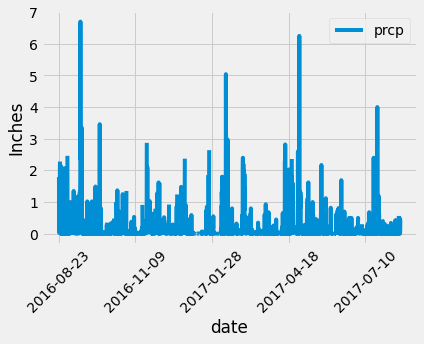

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data

sorted_df.plot(x= "date", y= "prcp", rot = 45)

plt.ylabel("Inches")

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data

sorted_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [33]:
# Design a query to show how many stations are available in this dataset?

#SELECT COUNT(station) FROM Station

number_stations = session.query(func.count(Station.station)).all()

number_stations

[(9)]

In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#SELECT station, COUNT(station) FROM Measurement GROUP BY station ORDER BY COUNT(station) DESC

active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#SELECT MIN(tobs),MAX(tobs),AVG(tobs) FROM Measurement WHERE station = "USC00519281"

temp_recordings = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281").all()

temp_recordings


[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Choose the station with the highest number of temperature observations.

In [36]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#SELECT tobs FROM Measurement WHERE station = "USC00519281" AND date >= date_one_yr_ago_dt

last_twelve_tobs = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= date_one_yr_ago_dt).all()

#last_twelve_tobs

last_twelve_tobs_df = pd.DataFrame(last_twelve_tobs, columns = ['tobs'])

Text(0.5, 0, 'Temperature')

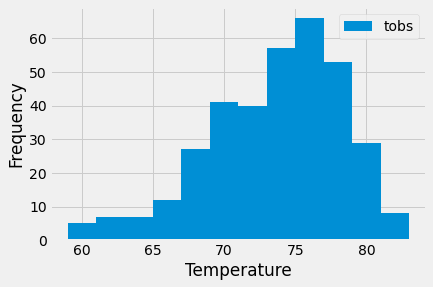

In [37]:
# Plot
last_twelve_tobs_df.plot.hist(bins=12)
plt.xlabel("Temperature")


In [ ]:
session.close()